In [1]:
import keras
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
% load_ext autoreload
% autoreload 2

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load data
data = pd.read_csv('data/challenge_2/video_count.csv')

# Sort data by video ID and date
data = data.sort_values(by=['video_id', 'date'])
data = data.reset_index(drop=True)

In [3]:
data.head(5)

,video_id,count,date
0,1,140460,2015-01-01
1,1,129082,2015-01-02
2,1,120868,2015-01-03
3,1,97849,2015-01-04
4,1,94821,2015-01-05


In [4]:
name = np.zeros((2785,15))
ID = np.zeros((2785,15))
# name = pd.DataFrame()

for i in range(2785):
    for j in range(15):
        name[i, j] = data['count'][(i*15)+j]
        ID[i,j] = data['video_id'][(i*15)+j]

In [38]:
concat = np.concatenate((name, new), axis=1)
concat.shape

(2785, 30)

## Clustering

In [40]:
from sklearn.cluster import KMeans
import numpy as np


kmeans = KMeans(n_clusters=3, random_state=0).fit(concat)
kmeans.labels_[:100]
# array([0, 0, 0, 1, 1, 1], dtype=int32)
# kmeans.predict([[0, 0], [4, 4]])
# array([0, 1], dtype=int32)
# kmeans.cluster_centers_
# array([[ 1.,  2.],
#        [ 4.,  2.]])

array([0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2,
       0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [41]:
kmeans.cluster_centers_

array([[2.35694999e+05, 2.07354645e+05, 1.85149002e+05, 1.65792167e+05,
        1.47671207e+05, 1.33903567e+05, 1.22998916e+05, 1.13697269e+05,
        1.05668065e+05, 1.01134940e+05, 9.94669479e+04, 1.00443350e+05,
        1.05756398e+05, 1.16630372e+05, 1.34714602e+05, 1.00000000e+00,
        1.04978317e+00, 1.15068021e+00, 1.31777428e+00, 1.59397925e+00,
        1.97310552e+00, 2.55703820e+00, 3.33025409e+00, 4.50480880e+00,
        6.13898548e+00, 8.46770169e+00, 1.17425745e+01, 1.63976597e+01,
        2.33529514e+01, 3.28609956e+01],
       [2.43722342e+06, 2.44076669e+06, 2.45456080e+06, 2.47452544e+06,
        2.49267245e+06, 2.49957790e+06, 2.49813956e+06, 2.49908210e+06,
        2.50814108e+06, 2.51757366e+06, 2.53269618e+06, 2.53276151e+06,
        2.53926224e+06, 2.53154777e+06, 2.52514702e+06, 1.00000000e+00,
        1.00287734e+00, 1.00934237e+00, 1.01752218e+00, 1.02557542e+00,
        1.02952228e+00, 1.02956292e+00, 1.03003188e+00, 1.03386448e+00,
        1.03762848e+00,

In [13]:
row_dict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

In [22]:
new = np.zeros(name.shape)

for i in range (2785):
    new[i,:] = name[i,:] / name[i,0]

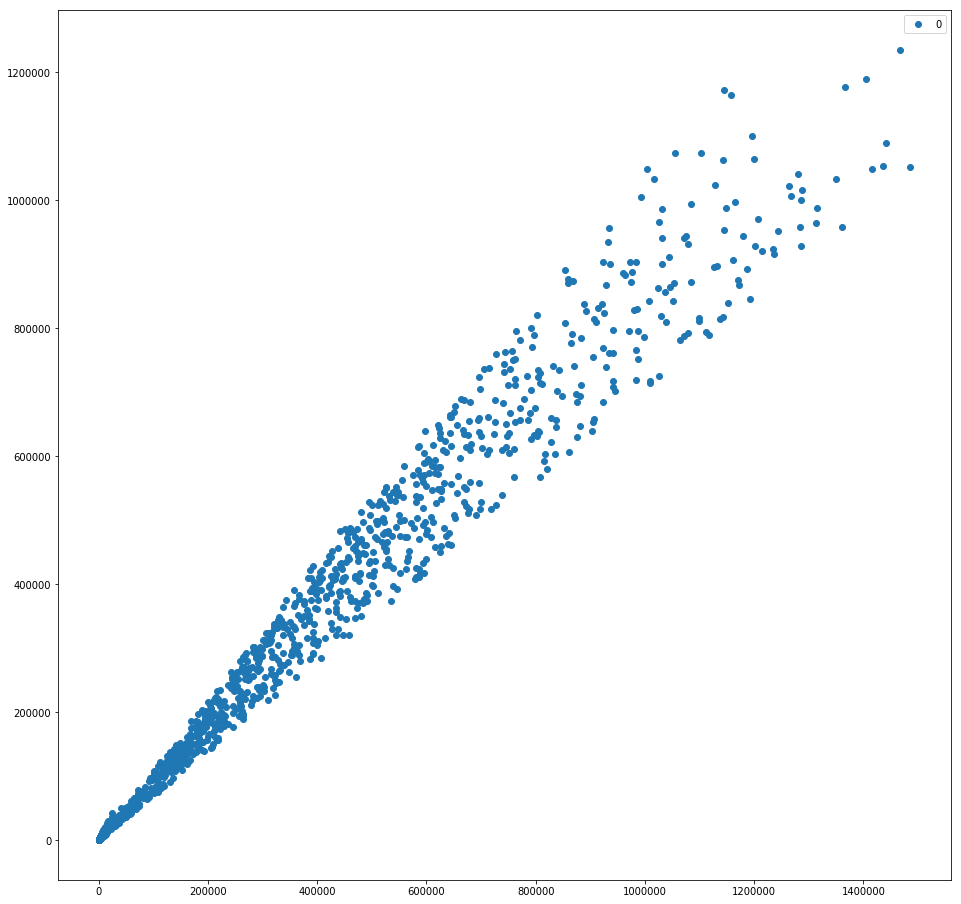

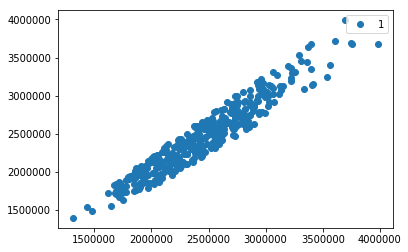

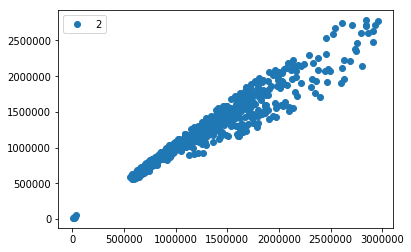

In [44]:
# Plot the results

code = ['0', '1', '2']
plt.figure(figsize=(16,16))
for i in set(kmeans.labels_):
    index = kmeans.labels_ == i
    plt.plot(name[index,0], name[index,1], 'o', label=code[i])
#     plt.hist(new[index,1], bins=100, label=code[i])
plt.legend()
plt.show()